In [1]:
import datetime
import pandas_datareader.data as web
from sarimaxModel import sarimaxPrdict
from sarimaxModel import quickParameters
from sarimaxModel import selectParameters
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
# We will look at stock prices over the past year, starting at January 1, 2016


ticker='CIA.AX'
months=12
end = datetime.date.today()
day=end.day
year=end.year-months//12-1
month=months%12+1
start=datetime.datetime(year,month,day)

data=web.DataReader(ticker,"yahoo",start,end)['Adj Close']   

#y=data.resample('MS').mean()

#parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
#parameters=selectParameters(ticker,y,steps=2,disp=True)
#['8CO.AX', 0, 0, 0, 0, 0, 0, 12, 't', -7.909122119923726, 0.03528654153968552]

#parameters=['MFG.AX', 0, 0, 1, 0, 1, 0, 12, 'n', 321.3071720270583, 0.486377988114156]
#data=data['2019-04-01':]

In [2]:
y=data.resample('C').mean()
steps=1
#parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
parameters=selectParameters(ticker,y,steps=steps,disp=False)

['CIA.AX', 0, 1, 1, 0, 1, 0, 12, 'ct', -193.07064262909955, 0.04023517522998743]


In [6]:
#y=data.resample('C').mean()
import statsmodels.api as sm
import os
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error


train_y, test_y = y[:-steps], y[-steps:]

p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
print(p1,p2,t)
model = SARIMAX(train_y,
     order=p1,
     seasonal_order=p2,
     trend=t,
     enforce_stationarity=False,
     enforce_invertibility=False)

model_fit = model.fit(disp=False)

forcast=model_fit.forecast(steps=len(test_y))



[0, 1, 1] [0, 1, 0, 12] ct


Date
2017-01-23    1.060
2017-01-24    1.310
2017-01-25      NaN
2017-01-26    1.100
2017-01-27    1.145
2017-01-30    1.250
2017-01-31    1.155
2017-02-01    1.070
2017-02-02    1.220
2017-02-03    1.160
2017-02-06    1.155
2017-02-07    1.160
2017-02-08    1.060
2017-02-09    1.150
2017-02-10    1.250
2017-02-13    1.445
2017-02-14    1.325
2017-02-15    1.300
2017-02-16    1.300
2017-02-17    1.220
2017-02-20    1.240
2017-02-21    1.100
2017-02-22    1.165
2017-02-23    1.100
2017-02-24    1.100
2017-02-27    1.000
2017-02-28    0.985
2017-03-01    1.040
2017-03-02    1.000
2017-03-03    1.010
              ...  
2019-04-12    2.430
2019-04-15    2.350
2019-04-16    2.350
2019-04-17    2.240
2019-04-18    2.270
2019-04-19      NaN
2019-04-22      NaN
2019-04-23    2.210
2019-04-24    2.260
2019-04-25      NaN
2019-04-26    2.260
2019-04-29    2.270
2019-04-30    2.220
2019-05-01    2.280
2019-05-02    2.270
2019-05-03    2.250
2019-05-06    2.270
2019-05-07    2.380
2019-05-08    2

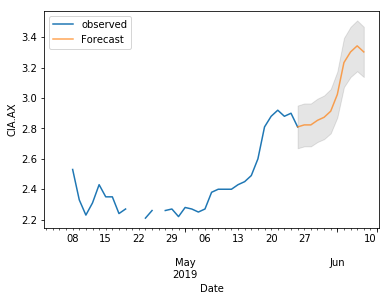

In [7]:
print(train_y)
print(test_y)
print(forcast) 
if( len(parameters)>0):
    
    p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
    result=sarimaxPrdict(ticker,y,p1,p2,t,steps=10,disp=True,days=50)
else:
    print("wrong parameters",len(parameters))

In [8]:
result

2019-05-24    2.810000
2019-05-27    2.823255
2019-05-28    2.823285
2019-05-29    2.853312
2019-05-30    2.873335
2019-05-31    2.913354
2019-06-03    3.023370
2019-06-04    3.233382
2019-06-05    3.303391
2019-06-06    3.343395
2019-06-07    3.303397
dtype: float64